In [1]:
%matplotlib inline


# Robust Scaling on Toy Data


Making sure that each Feature has approximately the same scale can be a
crucial preprocessing step. However, when data contains outliers,
:class:`StandardScaler <sklearn.preprocessing.StandardScaler>` can often
be mislead. In such cases, it is better to use a scaler that is robust
against outliers.

Here, we demonstrate this on a toy dataset, where one single datapoint
is a large outlier.


In [2]:
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [3]:
# Create training and test data
np.random.seed(42)
n_datapoints = 100
Cov = [[0.9, 0.0], [0.0, 20.0]]
mu1 = [100.0, -3.0]
mu2 = [101.0, -3.0]
X1 = np.random.multivariate_normal(mean=mu1, cov=Cov, size=n_datapoints)
X2 = np.random.multivariate_normal(mean=mu2, cov=Cov, size=n_datapoints)
Y_train = np.hstack([[-1]*n_datapoints, [1]*n_datapoints])
X_train = np.vstack([X1, X2])

X1 = np.random.multivariate_normal(mean=mu1, cov=Cov, size=n_datapoints)
X2 = np.random.multivariate_normal(mean=mu2, cov=Cov, size=n_datapoints)
Y_test = np.hstack([[-1]*n_datapoints, [1]*n_datapoints])
X_test = np.vstack([X1, X2])

X_train[0, 0] = -1000  # a fairly large outlier

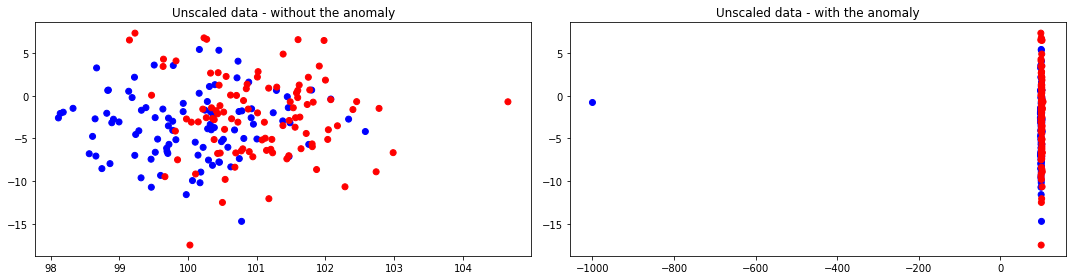

In [5]:
# Plot the (training) data
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].scatter(X_train[1:, 0], X_train[1:, 1],
              color=np.where(Y_train[1:] > 0, 'r', 'b'))

ax[1].scatter(X_train[:, 0], X_train[:, 1],
              color=np.where(Y_train > 0, 'r', 'b'))

ax[0].set_title("Unscaled data - without the anomaly")
ax[1].set_title("Unscaled data - with the anomaly")

plt.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()

In [ ]:
# TODO: create 3 scalers (for the names see the next cell)

# Scale data: MinMaxScaler()
# TODO

# Scale data: StandardScaler()
# TODO

# Scale data: RobustScaler()
# TODO

In [ ]:
# Plot data
fig, ax = plt.subplots(1, 4, figsize=(15, 4))
ax[0].scatter(X_train[:, 0], X_train[:, 1],
              color=np.where(Y_train > 0, 'r', 'b'))
ax[1].scatter(Xtr_mm[:, 0], Xtr_mm[:, 1], color=np.where(Y_train > 0, 'r', 'b'))
ax[2].scatter(Xtr_s[:, 0], Xtr_s[:, 1], color=np.where(Y_train > 0, 'r', 'b'))
ax[3].scatter(Xtr_r[:, 0], Xtr_r[:, 1], color=np.where(Y_train > 0, 'r', 'b'))

ax[0].set_title("Unscaled data")
ax[1].set_title("After MinMax scaling (zoomed in)")
ax[2].set_title("After standard scaling (zoomed in)")
ax[3].set_title("After robust scaling (zoomed in)")

# for the scaled data, we zoom in to the data center (outlier can't be seen!)
for a in ax[1:]:
    a.set_xlim(-3, 3)
    a.set_ylim(-3, 3)
plt.tight_layout()
plt.show()

In [ ]:
# Classify using k-NN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(Xtr_mm, Y_train)
acc_mm = knn.score(Xte_mm, Y_test)
print("Testset accuracy using min-max scaler: %.3f" % acc_mm)

# TODO: use the knn classifier with data scaled with the standard scaler


print("Testset accuracy using standard scaler: %.3f" % acc_s)


# TODO: use the knn classifier with data scaled with the robust scaler



print("Testset accuracy using robust scaler:   %.3f" % acc_r)